<a href="https://colab.research.google.com/github/Saifullah785/deep-learning-projects/blob/main/Project_06_Electric_Vehicle_Battery_Life_Prediction_Using_ANN/Project_06_Electric_Vehicle_Battery_Life_Prediction_Using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd # Used for data manipulation and analysis

from tensorflow.keras.models import Sequential # Used for building neural networks
from tensorflow.keras.layers import Dense, Dropout # Layers for the neural network

from sklearn.model_selection import train_test_split # Used for splitting data into training and testing sets
from sklearn.preprocessing import MinMaxScaler, LabelEncoder # Used for data preprocessing

In [2]:
# Read the metadata.csv file into a pandas DataFrame
df = pd.read_csv('/content/metadata.csv')

In [3]:
# Display the DataFrame to inspect the data
df

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
0,discharge,[2010. 7. 21. 15. 0. ...,4,B0047,0,1,00001.csv,1.6743047446975208,NaN,NaN
1,impedance,[2010. 7. 21. 16. 53. ...,24,B0047,1,2,00002.csv,NaN,0.05605783343888099,0.20097016584458333
2,charge,[2010. 7. 21. 17. 25. ...,4,B0047,2,3,00003.csv,NaN,NaN,NaN
3,impedance,[2010 7 21 20 31 5],24,B0047,3,4,00004.csv,NaN,0.05319185850921101,0.16473399914864734
4,discharge,[2.0100e+03 7.0000e+00 2.1000e+01 2.1000e+01 2...,4,B0047,4,5,00005.csv,1.5243662105099023,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7560,impedance,[2010. 9. 30. 7. 36. ...,24,B0055,247,7561,07561.csv,NaN,0.0968087979207628,0.15489738203707232
7561,discharge,[2010. 9. 30. 8. 8. ...,4,B0055,248,7562,07562.csv,1.0201379996149256,NaN,NaN
7562,charge,[2010. 9. 30. 8. 48. 54.25],4,B0055,249,7563,07563.csv,NaN,NaN,NaN
7563,discharge,[2010. 9. 30. 11. 50. ...,4,B0055,250,7564,07564.csv,0.9907591663373165,NaN,NaN


#**Data Preprocessing**

In [4]:
# Drop unnecessary columns from the DataFrame
# These columns are not needed for the model
df = df.drop(columns=['start_time','battery_id','test_id','uid','filename'])
df

,type,ambient_temperature,Capacity,Re,Rct
0,discharge,4,1.6743047446975208,NaN,NaN
1,impedance,24,NaN,0.05605783343888099,0.20097016584458333
2,charge,4,NaN,NaN,NaN
3,impedance,24,NaN,0.05319185850921101,0.16473399914864734
4,discharge,4,1.5243662105099023,NaN,NaN
...,...,...,...,...,...
7560,impedance,24,NaN,0.0968087979207628,0.15489738203707232
7561,discharge,4,1.0201379996149256,NaN,NaN
7562,charge,4,NaN,NaN,NaN
7563,discharge,4,0.9907591663373165,NaN,NaN


#**Filling Missing Values**

In [5]:
# Convert 'Re', 'Rct', and 'Capacity' to numeric, invalid parsing will be set to NaN
df['Re'] = pd.to_numeric(df['Re'], errors='coerce')
df['Rct'] = pd.to_numeric(df['Rct'], errors='coerce')
df['Capacity'] = pd.to_numeric(df['Capacity'], errors='coerce')


# Fill missing values in 'Re', 'Rct', and 'Capacity' with their respective means
# This is a common technique for handling missing data
df['Re'] = df['Re'].fillna(df['Re'].mean())
df['Rct'] = df['Rct'].fillna(df['Rct'].mean())
df['Capacity'] = df['Capacity'].fillna(df['Capacity'].mean())

df

,type,ambient_temperature,Capacity,Re,Rct
0,discharge,4,1.674305,-4.976500e+11,1.055903e+12
1,impedance,24,1.326543,5.605783e-02,2.009702e-01
2,charge,4,1.326543,-4.976500e+11,1.055903e+12
3,impedance,24,1.326543,5.319186e-02,1.647340e-01
4,discharge,4,1.524366,-4.976500e+11,1.055903e+12
...,...,...,...,...,...
7560,impedance,24,1.326543,9.680880e-02,1.548974e-01
7561,discharge,4,1.020138,-4.976500e+11,1.055903e+12
7562,charge,4,1.326543,-4.976500e+11,1.055903e+12
7563,discharge,4,0.990759,-4.976500e+11,1.055903e+12


# **Encoding**

In [6]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()
# Encode the 'type' column to convert categorical text data to numerical data
df['type'] = label_encoder.fit_transform(df['type'])

In [7]:
# Display the DataFrame to inspect the data after encoding
df

,type,ambient_temperature,Capacity,Re,Rct
0,1,4,1.674305,-4.976500e+11,1.055903e+12
1,2,24,1.326543,5.605783e-02,2.009702e-01
2,0,4,1.326543,-4.976500e+11,1.055903e+12
3,2,24,1.326543,5.319186e-02,1.647340e-01
4,1,4,1.524366,-4.976500e+11,1.055903e+12
...,...,...,...,...,...
7560,2,24,1.326543,9.680880e-02,1.548974e-01
7561,1,4,1.020138,-4.976500e+11,1.055903e+12
7562,0,4,1.326543,-4.976500e+11,1.055903e+12
7563,1,4,0.990759,-4.976500e+11,1.055903e+12


# **Train Test Split**

In [8]:
# Import the 'X' from the 're' module, which is not used in this cell.
from re import X
# Create the feature matrix (X) by dropping the target variable ('ambient_temperature')
x = df.drop(columns=['ambient_temperature'])

# Create the target vector (y) with the 'ambient_temperature'
y = df['ambient_temperature']

# Split the data into training and testing sets
# 80% of the data will be used for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets to verify the split
print(f'X_train shape: {X_train.shape}')

print(f'X_test shape: {X_test.shape}')

X_train shape: (6052, 4)
X_test shape: (1513, 4)


# **Scalling**

In [9]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()
# Fit the scaler to the training data and transform it
X_train = scaler.fit_transform(X_train)

In [10]:
# Transform the test data using the fitted scaler
X_test = scaler.transform(X_test)

# Print the first 5 rows of the scaled training data
print(f'Scaled X_train: \n{X_train[:5]}')

Scaled X_train: 
[[1.00000000e+00 5.02450122e-01 9.99999999e-01 1.98111482e-10]
 [5.00000000e-01 4.55998175e-01 0.00000000e+00 1.00000000e+00]
 [5.00000000e-01 3.60527766e-02 0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 5.02450122e-01 0.00000000e+00 1.00000000e+00]
 [5.00000000e-01 5.35874070e-01 0.00000000e+00 1.00000000e+00]]


#**Model Building**

In [11]:
# Initialize the Sequential model
model = Sequential()

# Add a dense layer with 64 units, ReLU activation function, and input shape
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
# Add a dropout layer to prevent overfitting
model.add(Dropout(0.2))

# Add another dense layer with 32 units and ReLU activation function
model.add(Dense(32, activation='relu'))
# Add another dropout layer
model.add(Dropout(0.2))

# Add the output layer with a single unit and linear activation function for regression
model.add(Dense(1, activation='linear'))

# Compile the model with the Adam optimizer, mean squared error loss function, and mean absolute error metric
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Print a summary of the model's architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,433 (9.50 KB)

 Trainable params: 2,433 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Train the model on the training data for 50 epochs with a batch size of 32
# and validate it on the test data
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 89.9087 - mae: 7.0207 - val_loss: 1574.7163 - val_mae: 7.5277
Epoch 2/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 90.9472 - mae: 7.1423 - val_loss: 1467.5571 - val_mae: 7.2817
Epoch 3/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 87.9460 - mae: 6.9212 - val_loss: 1410.9440 - val_mae: 7.4688
Epoch 4/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 90.2098 - mae: 7.0766 - val_loss: 1390.6188 - val_mae: 7.2513
Epoch 5/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 88.1949 - mae: 7.0216 - val_loss: 1432.8949 - val_mae: 7.4112
Epoch 6/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 90.0907 - mae: 7.0310 - val_loss: 1287.6271 - val_mae: 7.5026
Epoch 7/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 89.7853 - mae: 7.0637 - val_loss: 1416.7654 - val_mae: 7.3728
Epoch 8/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 87.8708 - mae: 6.9319 - val_loss: 1455.7668 - val_mae: 7.3959
Epoch 9/50
190/190 ━━━━━


# **Model Evaluation**

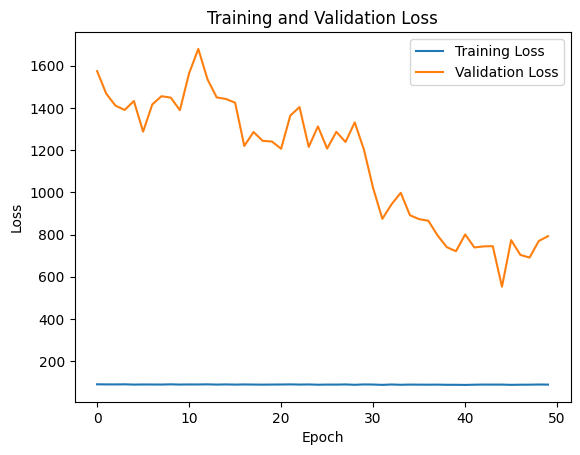

In [16]:
# Import the matplotlib.pyplot library for plotting
import matplotlib.pyplot as plt

# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
# Set the x-axis label
plt.xlabel('Epoch')
# Set the y-axis label
plt.ylabel('Loss')
# Set the title of the plot
plt.title('Training and Validation Loss')
# Display the legend
plt.legend()
# Show the plot
plt.show()